<a href="https://colab.research.google.com/github/ncavchl/Python-study/blob/master/stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!pip install yfinance
from datetime import datetime
import yfinance as yf
!pip install -U finance-datareader
import FinanceDataReader as fdr

from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr



today = datetime.today().strftime("%Y-%m-%d")


Requirement already up-to-date: finance-datareader in /usr/local/lib/python3.7/dist-packages (0.9.31)


In [2]:
for i in range(0, 10):
  # stock = str(i) + '.ks'
  booland = 000000

  print((i + booland))
  
  # ['005930.ks']
  # data = yf.download(stock,start = '2020-03-01')
  # print(data['Close'])

fdr.__version__

0
1
2
3
4
5
6
7
8
9


'0.9.31'

In [4]:
df_krx = fdr.StockListing('KRX')
len(df_krx)
# print(df_krx)
print(df_krx['Name'][1])

AJ네트웍스


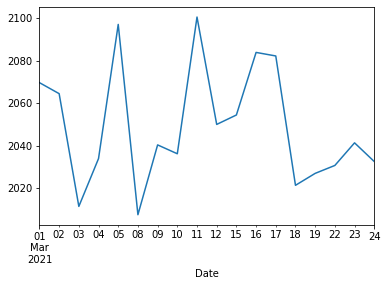

In [15]:
# for index in range(1,len(df_krx)):
#   df = fdr.DataReader(df_krx['Symbol'][index], '2021-03-22')
#   print('종가 : ', df['Close'][0], '- 기업명 : ', df_krx['Name'][index])
  # print(val)
# namef = df_krx['Name']
# print(namef.index('삼성전자'))


start_date = '2021-03-01'
end_date = '2021-03-25'
google_data = pdr.DataReader('GOOGL','yahoo', start_date, end_date)
google_data.head(9)
google_data['Close'].plot()

Date
2021-03-02    11150
2021-03-03    11200
2021-03-04    11150
2021-03-05    11100
2021-03-08    11100
2021-03-09    11150
2021-03-10    11150
2021-03-11    11150
2021-03-12    11150
2021-03-15    11150
2021-03-16    11150
2021-03-17    11150
2021-03-18    11150
2021-03-19    11150
2021-03-22    11150
2021-03-23    11150
2021-03-24    11150
2021-03-25    11400
Name: Close, dtype: int64


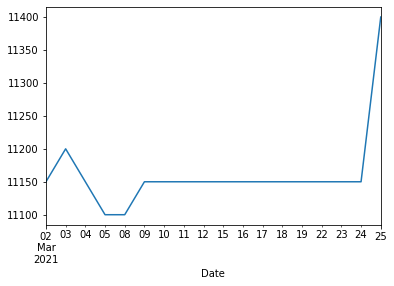

In [16]:
korea1 = pdr.DataReader('088980.ks', 'yahoo', start_date, end_date)
korea1.head(9)
print(korea1['Close'])
korea1['Close'].plot()

In [36]:
#https://wendys.tistory.com/174

# 종목 타입에 따라 download url이 다름. 종목코드 뒤에 .KS .KQ등이 입력되어야해서 Download Link 구분 필요
stock_type = {
'kospi': 'stockMkt',
'kosdaq': 'kosdaqMkt'
}
# 회사명으로 주식 종목 코드를 획득할 수 있도록 하는 함수
def get_code(df, name):
  code = df.query("name=='{}'".format(name))['code'].to_string(index=False)
  # 위와같이 code명을 가져오면 앞에 공백이 붙어있는 상황이 발생하여 앞뒤로 sript() 하여 공백 제거
  code = code.strip()
  return code

# download url 조합
def get_download_stock(market_type=None):
  market_type = stock_type[market_type]
  download_link = 'http://kind.krx.co.kr/corpgeneral/corpList.do'
  download_link = download_link + '?method=download'
  download_link = download_link + '&marketType=' + market_type
  df = pd.read_html(download_link, header=0)[0]
  return df;
# kospi 종목코드 목록 다운로드
def get_download_kospi():
  df = get_download_stock('kospi')
  df.종목코드 = df.종목코드.map('{:06d}.KS'.format)
  return df
# kosdaq 종목코드 목록 다운로드
def get_download_kosdaq():
  df = get_download_stock('kosdaq')
  df.종목코드 = df.종목코드.map('{:06d}.KQ'.format)
  return df

# kospi, kosdaq 종목코드 각각 다운로드
kospi_df = get_download_kospi()
kosdaq_df = get_download_kosdaq()
# data frame merge
code_df = pd.concat([kospi_df, kosdaq_df])
# data frame정리
code_df = code_df[['회사명', '종목코드']]
# data frame title 변경 '회사명' = name, 종목코드 = 'code'
code_df = code_df.rename(columns={'회사명': 'name', '종목코드': 'code'})






Date
2021-03-02    135500
2021-03-03    136000
2021-03-04    130500
2021-03-05    128500
2021-03-08    125000
2021-03-09    121500
2021-03-10    120000
2021-03-11    123000
2021-03-12    124500
2021-03-15    123000
2021-03-16    126000
2021-03-17    132500
2021-03-18    130500
2021-03-19    131500
2021-03-22    128500
2021-03-23    127000
2021-03-24    129500
2021-03-25    128000
Name: Close, dtype: int64


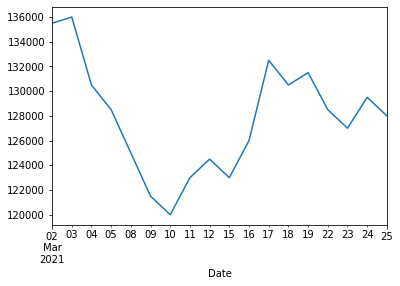

In [48]:
# 삼성전자의 종목코드 획득. data frame에는 이미 XXXXXX.KX 형태로 조합이 되어있음
code = get_code(code_df, '대웅제약')
# get_data_yahoo API를 통해서 yahho finance의 주식 종목 데이터를 가져온다.
# df = pdr.get_data_yahoo(code)
df = pdr.DataReader(code,'yahoo', start_date, end_date)


# 표출 기간 설정 
start_date = '2021-03-01'
end_date = '2021-03-25'

print(df['Close'])
df['Close'].plot()




In [51]:
#yahoo 말고 financeDatareader
kospi = '^KS11'
kosdaq = '^KQ11'
kospi50 = '^KS50'
kospi100 = '^KS100'
krx100 = '^KRX100'
ks200 = '^KS200'

dji = '^DJI' #다우존스
ixic = '^IXIC' #나스닥
snp500 = '^US500' #S&P 500



# dd = fdr.DataReader('KS11', '2021')
dd = pdr.DataReader(kospi,'yahoo', start_date, end_date)
print(dd['Close'])

Date
2021-03-02    3043.870117
2021-03-03    3082.989990
2021-03-04    3043.489990
2021-03-05    3026.260010
2021-03-08    2996.110107
2021-03-09    2976.120117
2021-03-10    2958.120117
2021-03-11    3013.699951
2021-03-12    3054.389893
2021-03-15    3045.709961
2021-03-16    3067.169922
2021-03-17    3047.500000
2021-03-18    3066.010010
2021-03-19    3039.530029
2021-03-22    3035.459961
2021-03-23    3004.739990
2021-03-24    2996.350098
2021-03-25    3008.330078
Name: Close, dtype: float64
